In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import linear_model

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [106]:
# This function will generate a dataframe out of a time series list
def time_to_df(list1, number_of_attributes = 3):
    df = pd.DataFrame(columns=range(number_of_attributes))
    
    for i in range(len(list1)-number_of_attributes+1):
        record = []
        for j in range(i,i+number_of_attributes):
            record.append(list1[j])
        df.loc[len(df.index)] = record
        
        
    return df

# This function trains the model using the input data(dataframe)
def train_and_forecast(list1, number_of_forecast = 5, number_of_attributes = 3):

    input1 = time_to_df(list1, number_of_attributes)
    
    # We take last column of the features as target and rest are taken as attributes
    featureMat = input1.iloc[:, : len(input1.columns) - 1]
    label = input1[input1.columns[-1]]
    train_features, test_features, train_res, test_res= train_test_split(featureMat,label)
    
    # Here we are using linear regression model
    model = linear_model.ElasticNet()
    model.fit(train_features, train_res)
    
    # Checking for the score
    #print("Score (R2 score): ", model.score(test_features, test_res))
    forecasted_values = []
    
    for i in range(number_of_forecast):
        
        features_for_forecast = list1[-number_of_attributes+1:]
        forecasted_value = int(model.predict([features_for_forecast])[0]*10)/10
        forecasted_values.append(forecasted_value)
        list1.append(forecasted_value)
        
    print("Forcasted values: ", forecasted_values)
    return forecasted_values


In [107]:
data1 = pd.read_excel("arms ExpImp updated.xlsx")
data2 = pd.read_excel("depenses updated.xlsx")


In [108]:
data1.head()

,Year,Ukraine import,Ukraine Export(Billion $),Russia import,Russia Export(Billion $)
0,1995,NaN,167,NaN,3.89
1,1996,NaN,236,NaN,3.55
2,1997,NaN,558,NaN,3.35
3,1998,NaN,708,NaN,2.03
4,1999,NaN,732,NaN,4.26


In [109]:
data2.head()

,Year,Ukraine (Billion $),Russia
0,2000,0.69,9.23
1,2001,0.74,11.68
2,2002,0.87,13.94
3,2003,1.10,16.97
4,2004,1.32,20.96


## Predictions on the Export and Imports of Ukraine and Russia

Predictions on the Export and Imports of Ukrain and Russia.

Yearly Predictions for  Ukraine import  for next  5  years.
 **************************************************
Forcasted values:  [67.4, 102.2, 265.6, 245.0, 349.8]


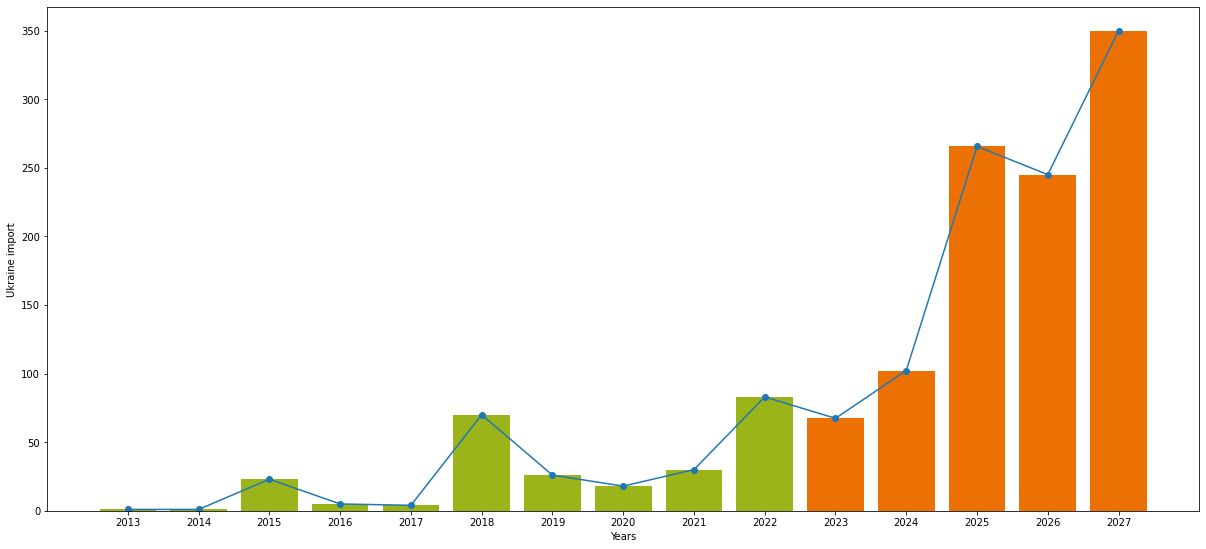

Yearly Predictions for  Ukraine Export(Billion $)  for next  5  years.
 **************************************************
Forcasted values:  [42.6, 65.3, 97.0, 111.0, 122.8]


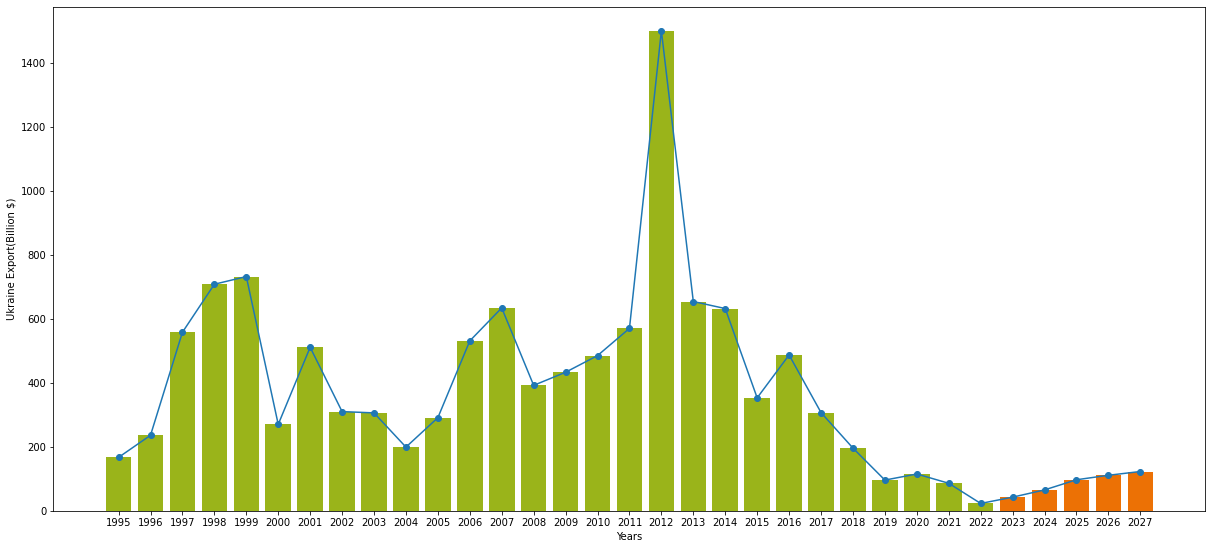

Yearly Predictions for  Russia import  for next  5  years.
 **************************************************
Forcasted values:  [132.3, 152.2, 149.5, 148.3, 147.9]


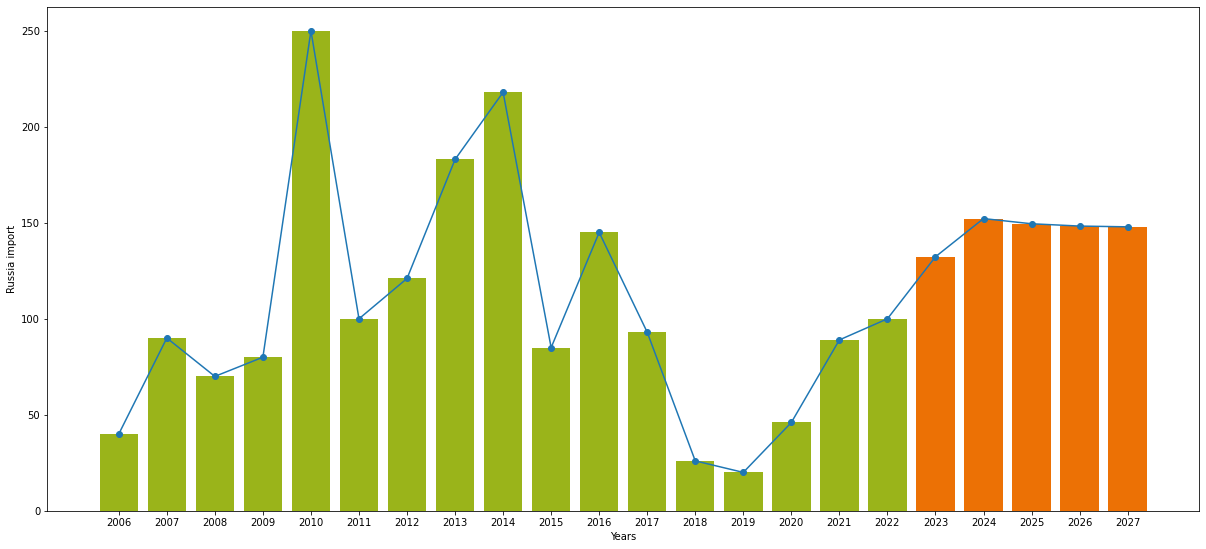

Yearly Predictions for  Russia Export(Billion $)  for next  5  years.
 **************************************************
Forcasted values:  [3.1, 4.1, 4.6, 4.9, 5.1]


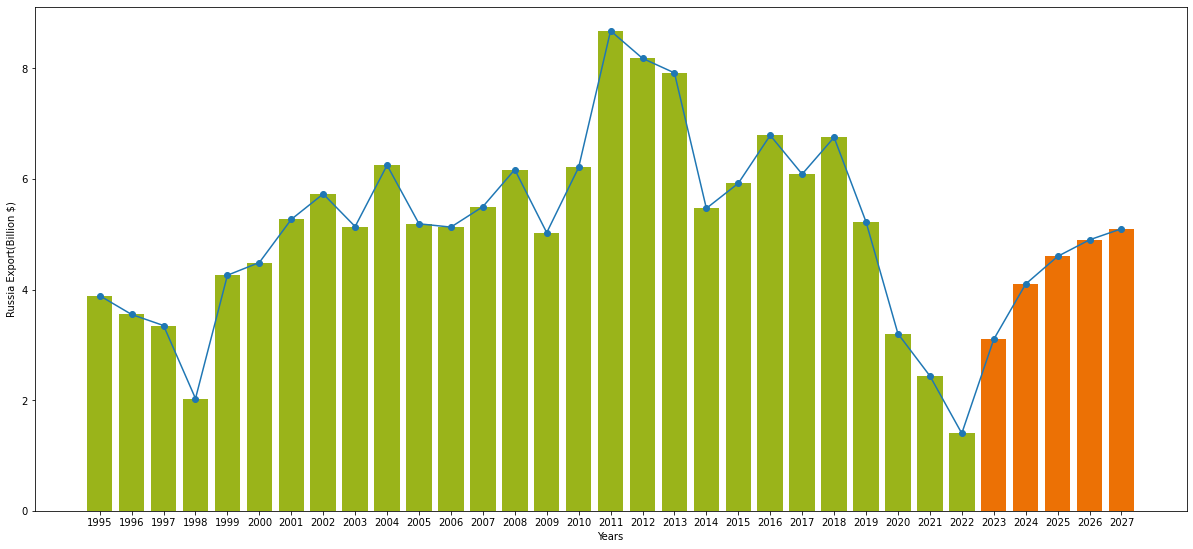

In [110]:
print("Predictions on the Export and Imports of Ukrain and Russia.\n")

nof = 5
noa = 5
for col in data1.columns.to_list():
    if col == "Year":
        pass
    else:
        print("Yearly Predictions for ", col, " for next ", nof," years.\n","*"*50)
        data = data1[[col,"Year"]].dropna(axis = 0)
        year_list = data["Year"].to_list()
        forcasted = train_and_forecast(data[col].to_list(), number_of_forecast = nof, number_of_attributes = noa)
        U = data[col].to_list()
        colors = ["#9AB41A" for i in U]
        for i in forcasted:
            U.append(i)
            year_list.append(year_list[-1]+1)
            colors.append("#EC7105")

        fig = plt.figure(figsize =(16, 7))
        ax = fig.add_axes([0,0,1,1])


        ax.plot(year_list, U,'-o')
        ax.set_ylabel(col)
        ax.set_xlabel("Years")
        
        ax.bar(year_list,U,color = colors, align='center')
        ax.set_xticks(year_list)
        ax.set_xticklabels(year_list)
        
        plt.show()
       

## Predictions on the dispenses of Ukraine and Russia

Predictions on the dispenses of Ukrain and Russia.

Yearly Predictions for  Ukraine (Billion $)  for next  5  years.
 **************************************************
Forcasted values:  [7.2, 7.4, 7.3, 7.3, 7.2]


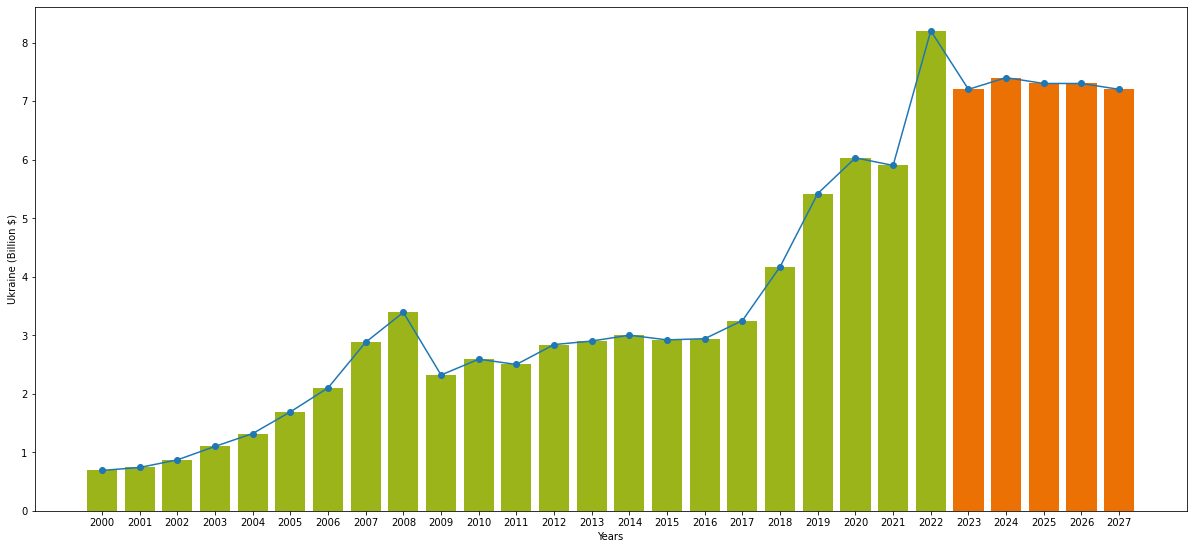

Yearly Predictions for  Russia  for next  5  years.
 **************************************************
Forcasted values:  [71.4, 70.7, 68.4, 65.2, 61.7]


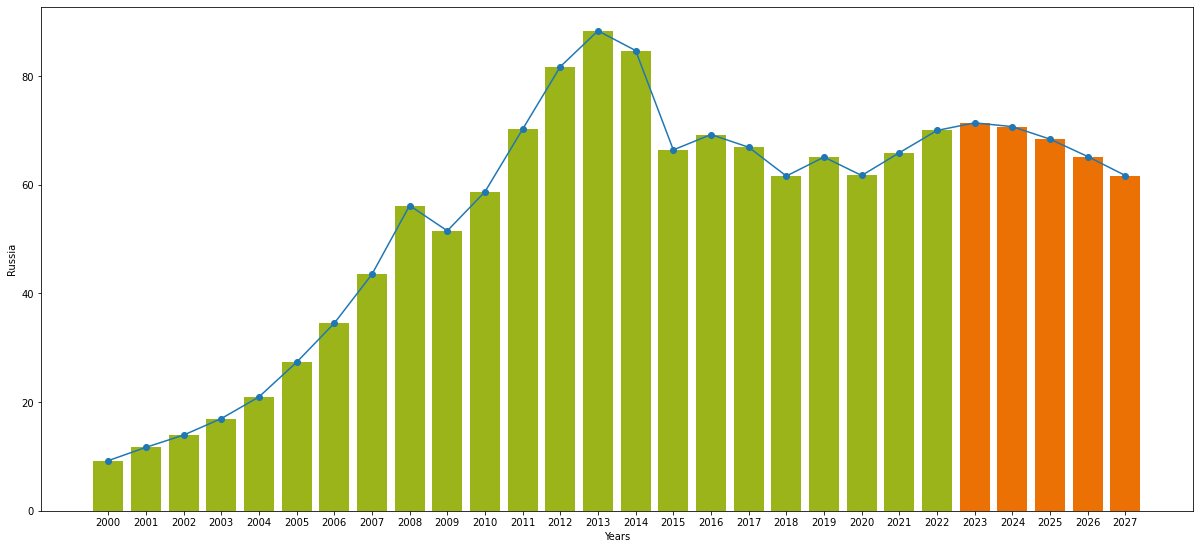

In [111]:
print("Predictions on the dispenses of Ukrain and Russia.\n")

nof = 5
noa = 4
for col in data2.columns.to_list():
    if col == "Year":
        pass
    else:
        print("Yearly Predictions for ", col, " for next ", nof," years.\n","*"*50)
        data = data2[[col,"Year"]].dropna(axis = 0)
        year_list = data["Year"].to_list()
        forcasted = train_and_forecast(data[col].to_list(), number_of_forecast = nof, number_of_attributes = noa)
        U = data[col].to_list()
        colors = ["#9AB41A" for i in U]
        for i in forcasted:
            U.append(i)
            year_list.append(year_list[-1]+1)
            colors.append("#EC7105")

        fig = plt.figure(figsize =(16, 7))
        ax = fig.add_axes([0,0,1,1])


        ax.plot(year_list, U,'-o')
        ax.set_ylabel(col)
        ax.set_xlabel("Years")
        
        ax.bar(year_list,U,color = colors, align='center')
        ax.set_xticks(year_list)
        ax.set_xticklabels(year_list)
        
        plt.show()
       